In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
df1 = pd.read_csv('2018.csv')
df1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [7]:
df1.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
df1['Perceptions of corruption'].mean()

0.11200000000000002

In [10]:
df1['Perceptions of corruption'].fillna(round(df1['Perceptions of corruption'].mean(), 6), inplace = True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [12]:
df1.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

Пустых значений нет

In [13]:
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Text(0.5, 1.0, 'Карта корреляции данных')

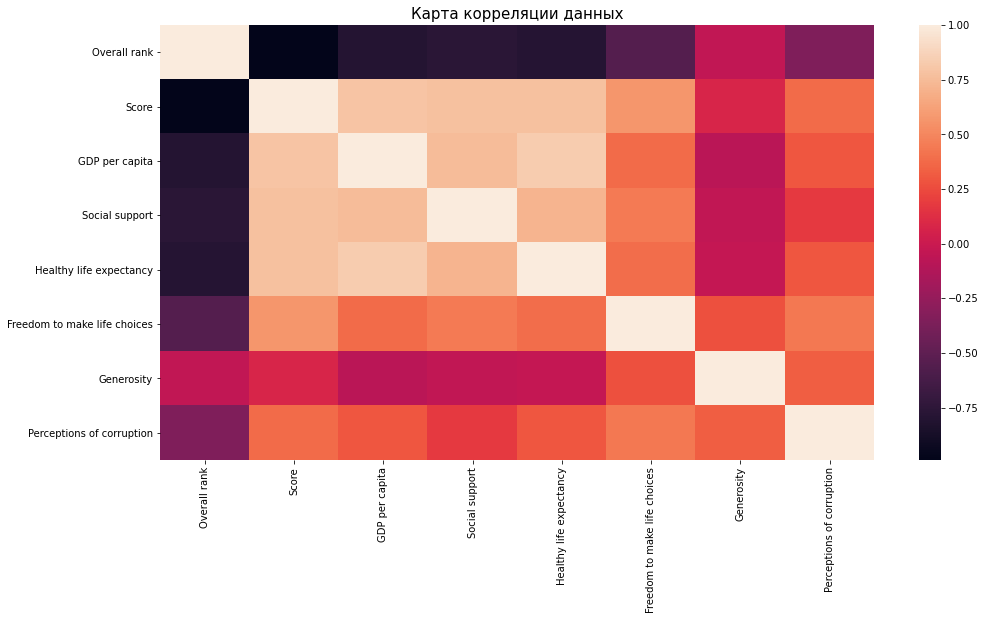

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(df.corr(), ax = ax)
plt.title('Карта корреляции данных', fontsize = 15)

In [15]:
model1 = LinearRegression()
X = df.drop(['Overall rank', 'Country or region', 'Score'], axis = 1)
Y = df['Score']
display(X)
Y

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

In [20]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train = X
X_test = df1.drop(['Overall rank', 'Country or region', 'Score'], axis = 1)
Y_train = Y
Y_test = df1['Score']

X_train.shape, X_test.shape

((156, 6), (156, 6))

In [21]:
model = LinearRegression()
model.fit(X_train, Y_train)
print('R^2: {0}'.format(model.score(X_test, Y_test)))
coef = pd.DataFrame(zip(['intercept'] + X_train.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
columns=['predictor', 'coef'])
print("RMSE = {}".format((mean_squared_error(Y_test, model.predict(X_test),  squared = False))))
coef

R^2: 0.7848453582125361
RMSE = 0.51761312289165


,predictor,coef
0,intercept,1.795220
1,GDP per capita,0.775372
2,Social support,1.124192
3,Healthy life expectancy,1.078143
4,Freedom to make life choices,1.454832
5,Generosity,0.489783
6,Perceptions of corruption,0.972280


In [22]:
alphas = np.linspace(0.1, 100, 1000)
model1 = LassoCV(alphas = alphas)
model1.fit(X_train, Y_train)
score = "Качество модели (R^2) = {}".format(model1.score(X_train, Y_train))
coef = pd.DataFrame(zip(['intercept'] + X_train.columns.tolist(), [model1.intercept_] + model1.coef_.tolist()),
                columns = ['predict', 'coef'])
display(coef)
pred = model.predict(X_test)
print("RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False)))
print('Идеальное значение альфа = {}'.format(model1.alpha_))

,predict,coef
0,intercept,3.691302
1,GDP per capita,1.354295
2,Social support,0.405321
3,Healthy life expectancy,0.000000
4,Freedom to make life choices,0.000000
5,Generosity,0.000000
6,Perceptions of corruption,0.000000


RMSE = 0.51761312289165
Идеальное значение альфа = 0.1


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_params = {'max_depth': np.arange(1, 20), 
               'max_features': range(1, 8)}

reg_tree = DecisionTreeRegressor(max_depth=15, random_state=17)
reg_tree_grid = GridSearchCV(reg_tree, tree_params, 
                             cv=5, 
                             n_jobs=-1,
                             verbose=True)

reg_tree_grid.fit(X_train, Y_train)
reg_tree_pred = reg_tree_grid.predict(X_test)

print(reg_tree_grid.best_score_)
print(reg_tree_grid.best_params_)
print('R^2: {0}'.format(reg_tree_grid.score(X_test, Y_test)))
print("RMSE = {}".format((mean_squared_error(Y_test, reg_tree_pred,  squared = False))))

Fitting 5 folds for each of 133 candidates, totalling 665 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.8s


-9.85651244806462
{'max_depth': 5, 'max_features': 5}
R^2: 0.6109043465195372
RMSE = 0.6960783208569057


[Parallel(n_jobs=-1)]: Done 665 out of 665 | elapsed:    7.4s finished


In [21]:
GridSearchCV?

In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsRegressor(n_neighbors=8)
knn_grid = GridSearchCV(knn, knn_params, 
                             cv = 5, 
                             n_jobs = -1,
                             verbose = True)

knn_grid.fit(X_train, Y_train)
knn_pred = knn_grid.predict(X_test)

print(knn_grid.best_score_)
print(knn_grid.best_params_)
print('R^2: {0}'.format(knn_grid.score(X_test, Y_test)))
print("RMSE = {}".format((mean_squared_error(Y_test, knn_pred,  squared = False))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-7.536622586914936
{'n_neighbors': 8}
R^2: 0.8322428436149167
RMSE = 0.45705708580821724


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


Можно сделать вывод, что лучшего всего модель обучается на моделях линейная регрессия и к-ближайших соседий.

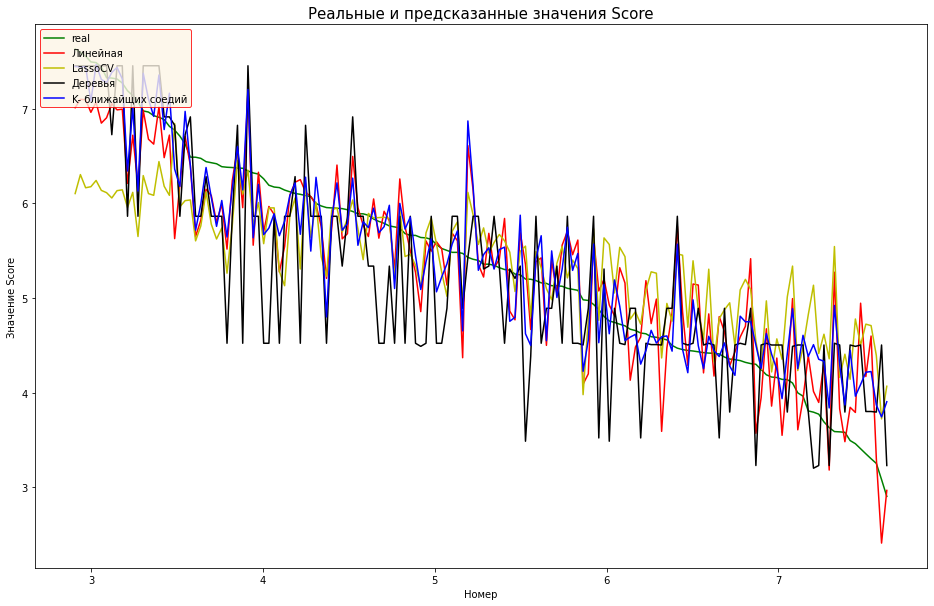

In [26]:
fig = plt.figure(figsize=(16, 10))

plt.plot(np.linspace(min(Y_test), max(Y_test), len(Y_test)), Y_test, color='green', 
         alpha=1, 
         label = 'real')
plt.plot(np.linspace(min(Y_test), max(Y_test), len(Y_test)), model.predict(X_test), color='r', 
         alpha=1,
         label = 'Линейная')
plt.plot(np.linspace(min(Y_test), max(Y_test), len(Y_test)), model1.predict(X_test), color='y', 
         alpha=1,
         label = 'LassoCV')
plt.plot(np.linspace(min(Y_test), max(Y_test), len(Y_test)), reg_tree_pred , color='black', 
         alpha=1,
         label = 'Деревья')
plt.plot(np.linspace(min(Y_test), max(Y_test), len(Y_test)), knn_pred, color='blue', 
         alpha=1,
         label = 'K- ближайщих соедий')


plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

plt.xlabel('Номер')
plt.ylabel('Значение Score')
plt.title("Реальные и предсказанные значения Score", fontsize = 15)

plt.show()

Text(0.5, 1.0, 'Реальные и предсказанные значения Score')

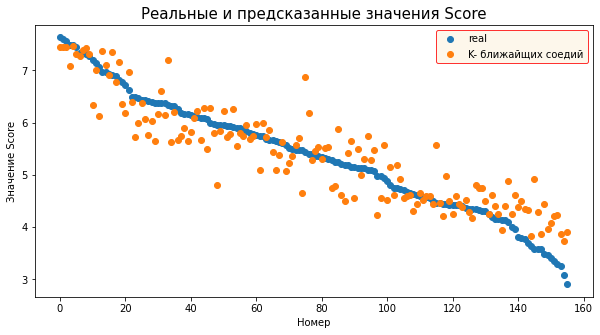

In [27]:
plt.figure(figsize = (10, 5))
plt.scatter(Y_test.index,
            Y_test,
            label = 'real')
plt.scatter(Y_test.index,
            knn_pred,
            label = 'K- ближайщих соедий')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper right')
plt.xlabel('Номер')
plt.ylabel('Значение Score')
plt.title("Реальные и предсказанные значения Score", fontsize = 15)

Text(0.5, 1.0, 'Реальные и предсказанные значения Score')

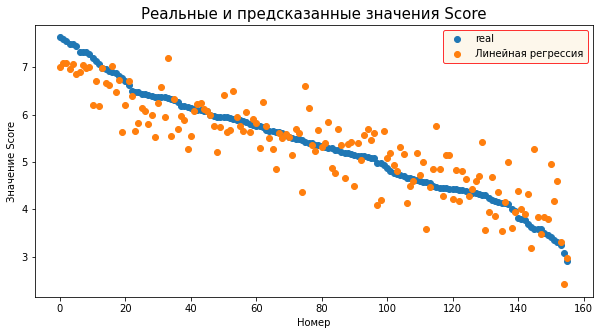

In [28]:
plt.figure(figsize = (10, 5))
plt.scatter(Y_test.index,
            Y_test,
            label = 'real')
plt.scatter(Y_test.index,
            model.predict(X_test),
            label = 'Линейная регрессия')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper right')
plt.xlabel('Номер')
plt.ylabel('Значение Score')
plt.title("Реальные и предсказанные значения Score", fontsize = 15)

По графикам сложно оценить, какая из двух моделей лучше, можно лишь слелать вывод, что они себя ведут одинаково.
KNN КАЧЕСТВО 0.83

In [30]:
from sklearn.tree import DecisionTreeRegressor
def f(v, X, Y, x, y):
    global knn_grid
    x.loc[0] = v
    print(x.loc[0])
    knn_grid_pred = knn_grid.predict(x)
    print('Показатель счатья составляет', round(knn_grid_pred[-1], 3))

In [31]:
value = input('Введите значения по порядку (GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption): ')
value = value.split(' ')
value = [float(i) for i in value]
print(value)
f(value, X_train, Y_train, X_test, Y_test)

Введите значения по порядку (GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption): 0.442 1.073 0.343 0.244 0.083 0.064
[0.442, 1.073, 0.343, 0.244, 0.083, 0.064]
GDP per capita                  0.442
Social support                  1.073
Healthy life expectancy         0.343
Freedom to make life choices    0.244
Generosity                      0.083
Perceptions of corruption       0.064
Name: 0, dtype: float64
Показатель счатья составляет 3.905
